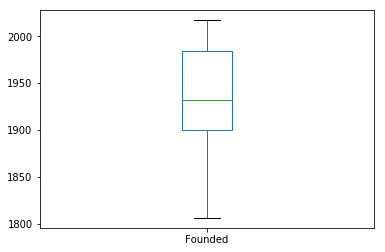

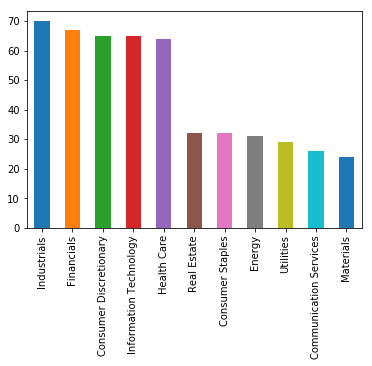

In [18]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

# Open Website and get only the table on the page with the relevant data. In this hardcoded case 

def get_wikipedia_html(url):
    return urllib.request.urlopen(url).read().decode("utf-8") # TODO exceptions

whtml = get_wikipedia_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S.26P_500_Component_Stocks")

# first table of the HTML (there may be more than one!)
# header=0 means that the first row is used as a header 
df = pd.read_html(whtml, header=0)[0] 

plt.figure()
pd.to_numeric(df["Founded"], errors="coerce").plot.box()
plt.show()

plt.figure()
df["GICS Sector"].value_counts().plot.bar() # or pie()
plt.show()



In [2]:
with open("list_of_PCMs.txt") as f:
    wurls = f.readlines()
BASE_WIKIPEDIA_URL="https://en.wikipedia.org/wiki/"

cols_stats = ["URL", "nrows", "ncols"]
df_stats = pd.DataFrame(columns=cols_stats)
    
for wurl in wurls:    
    print ("Extracting from", wurl)
    try:
        wfurl = BASE_WIKIPEDIA_URL + wurl
        whtml = get_wikipedia_html(wfurl)
        
        # TODO there may be more than one table
        # TODO header=0 means that the first row is used as a header, but it can be different 
        # TODO there are other ways to process the HTML (but pandas facilities sound great!)
        df = pd.read_html(whtml, header=0)[0]
        
        print (df.shape)
        vals = [wurl, df.shape[0], df.shape[1]]
        df_stats = df_stats.append(dict(zip(cols_stats, vals)), ignore_index=True)
    except urllib.request.HTTPError: 
        print ("URL is not valid!")
    except UnicodeEncodeError:
        print ("ASCII decoding error")
    


Extracting from Comparison_between_Esperanto_and_Ido

(4, 6)
Extracting from Comparison_between_Esperanto_and_Interlingua

(4, 6)
Extracting from Comparison_between_Esperanto_and_Novial

(0, 2)
Extracting from Comparison_between_Ido_and_Interlingua

(0, 2)
Extracting from Comparison_between_Ido_and_Novial

(0, 2)
Extracting from Comparison_between_U.S._states_and_countries_by_GDP_(PPP)

(51, 4)
Extracting from Comparison_of_ALGOL_68_and_C++

(0, 2)
Extracting from Comparison_of_Afrikaans_and_Dutch

(187, 3)
Extracting from Comparison_of_Android_e-book_reader_software

(16, 4)
Extracting from Comparison_of_Asian_national_space_programs

(0, 7)
Extracting from Comparison_of_Axis_&_Allies_games

(4, 6)
Extracting from Comparison_of_C_Sharp_and_Visual_Basic_.NET

(5, 1)
Extracting from Comparison_of_Chernobyl_and_other_radioactivity_releases

(0, 2)
Extracting from Comparison_of_Exchange_ActiveSync_clients

URL is not valid!
Extracting from Comparison_of_Hokkien_writing_systems

(28, 1)
Ex

(23, 8)
Extracting from Comparison_of_hub_gears

(35, 11)
Extracting from Comparison_of_iSCSI_targets

(6, 8)
Extracting from Comparison_of_karate_styles

(4, 6)
Extracting from Comparison_of_macro_recorder_software

URL is not valid!
Extracting from Comparison_of_mobile_phone_standards

(0, 2)
Extracting from Comparison_of_neurofeedback_software

(0, 2)
Extracting from Comparison_of_object-relational_mapping_software

(25, 6)
Extracting from Comparison_of_object_database_management_systems

(16, 7)
Extracting from Comparison_of_online_charity_donation_services_in_the_United_Kingdom

(7, 6)
Extracting from Comparison_of_online_dating_websites

(39, 9)
Extracting from Comparison_of_online_music_lockers

(19, 8)
Extracting from Comparison_of_optimization_software

(0, 2)
Extracting from Comparison_of_packet_analyzers

(27, 6)
Extracting from Comparison_of_popular_optical_data-storage_systems

(5, 2)
Extracting from Comparison_of_programming_languages_(strings)

(0, 2)
Extracting from Com

(13, 3)
Extracting from Comparison_of_disk_encryption_software

(73, 5)
Extracting from Comparison_of_download_managers

(21, 10)
Extracting from Comparison_of_eDonkey_software

(8, 10)
Extracting from Comparison_of_file_comparison_tools

(26, 11)
Extracting from Comparison_of_file_verification_software

(55, 11)
Extracting from Comparison_of_firewalls

(22, 4)
Extracting from Comparison_of_genealogy_software

(26, 11)
Extracting from Comparison_of_iPod_managers

(4, 6)
Extracting from Comparison_of_image_viewers

(36, 4)
Extracting from Comparison_of_layout_engines_(HTML5)

(0, 2)
Extracting from Comparison_of_layout_engines_(XML)

(8, 2)
Extracting from Comparison_of_layout_engines_(non-standard_HTML)

(0, 2)
Extracting from Comparison_of_massively_multiplayer_online_role-playing_games

(0, 2)
Extracting from Comparison_of_microblogging_services

(12, 8)
Extracting from Comparison_of_movie_cameras

(29, 7)
Extracting from Comparison_of_national_standards_of_Chinese

(20, 8)
Extractin

In [3]:
df_stats

,URL,nrows,ncols
0,Comparison_between_Esperanto_and_Ido\n,4,6
1,Comparison_between_Esperanto_and_Interlingua\n,4,6
2,Comparison_between_Esperanto_and_Novial\n,0,2
3,Comparison_between_Ido_and_Interlingua\n,0,2
4,Comparison_between_Ido_and_Novial\n,0,2
5,Comparison_between_U.S._states_and_countries_b...,51,4
6,Comparison_of_ALGOL_68_and_C++\n,0,2
7,Comparison_of_Afrikaans_and_Dutch\n,187,3
8,Comparison_of_Android_e-book_reader_software\n,16,4
9,Comparison_of_Asian_national_space_programs\n,0,7


In [4]:
df_stats['nrows'].max(), df_stats['ncols'].max()

(981, 1473)

In [19]:
df_stats.loc[df_stats['ncols'].apply(pd.to_numeric, errors = 'coerce').idxmax()]['URL'] # TODO: troubles with argmax

'Comparison_between_U.S._states_and_countries_by_GDP_(nominal)\n'